<a href="https://colab.research.google.com/github/etgcrog/rede-nerural/blob/master/bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
%tensorflow_version 2.x

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [322]:
df = pd.read_csv("day.csv")

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [324]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [325]:
df.drop(['instant', 'casual', 'registered', 'yr', 'mnth', 'holiday', 'weathersit'], axis=1, inplace=True)

In [326]:
df = df.set_index(pd.DatetimeIndex(df['dteday']))
df.drop(['dteday'], axis=1, inplace=True)

<Axes: >

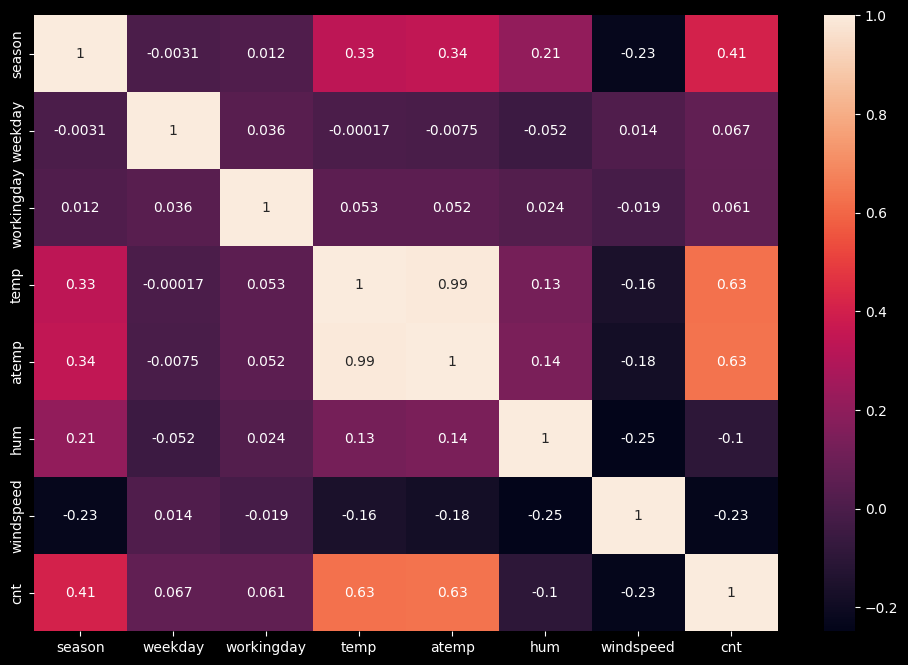

In [327]:
plt.style.use("dark_background")
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'Quantidade')

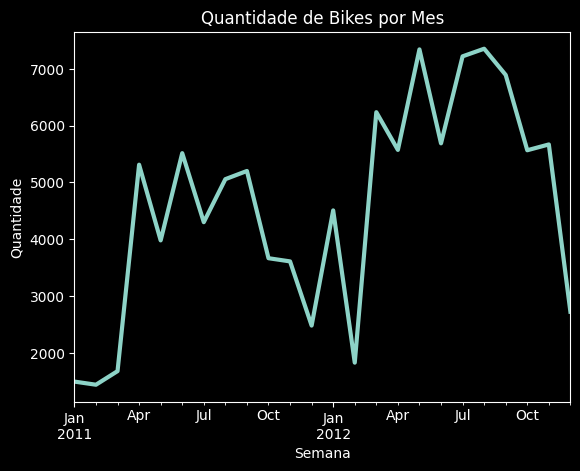

In [328]:
df['cnt'].asfreq('M').plot(linewidth=3)
plt.title("Quantidade de Bikes por Mes")
plt.xlabel('Semana')
plt.ylabel('Quantidade')

In [329]:
df.head()

,season,weekday,workingday,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,
2011-01-01,1,6,0,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,1,0,0,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,1,2,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,1,3,1,0.226957,0.229270,0.436957,0.186900,1600


In [330]:
df['weekday'].value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

In [331]:
df_numerical = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
df_categorical = df[['season', 'weekday']]

In [332]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df_categorical).toarray()

In [333]:
df_numerical = df_numerical.reset_index()

In [334]:
df_categorical = pd.DataFrame(encoded)

df_final = pd.concat([df_categorical, df_numerical], axis=1)

In [335]:
df_final.drop("dteday", axis=1, inplace=True)

In [336]:
df_final.head(2)

,0,1,2,3,4,5,6,7,8,9,10,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.344167,0.363625,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363478,0.353739,0.696087,0.248539,801


In [337]:
X = df_final.drop('cnt', axis=1)
y = df_final['cnt'].array.reshape(-1, 1)

In [338]:
scaler = MinMaxScaler()
scaler.fit(y)
y = scaler.transform(y)

In [339]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [340]:
x_train.shape

(511, 15)

In [341]:
input_shape = x_train.shape[1]

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=8, activation='relu', input_shape=(input_shape,)))
model.add(tf.keras.layers.Dense(units=16 ,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=16 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [342]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 128       
                                                                 
 dense_37 (Dense)            (None, 16)                144       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 16)                272       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [343]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [344]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)
]

In [345]:
history = model.fit(x_train, y_train, 
                    epochs=1000, 
                    batch_size=1, 
                    validation_split=0.2, 
                    callbacks=my_callbacks, 
                    verbose=False)

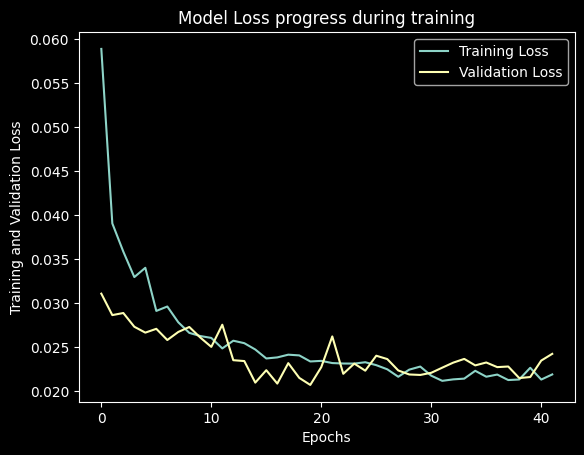

In [346]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss progress during training")
plt.xlabel("Epochs")
plt.ylabel('Training and Validation Loss')
plt.legend(["Training Loss", "Validation Loss"])

In [347]:
y_predict = model.predict(x_test)

7/7 [==============================] - 0s 4ms/step


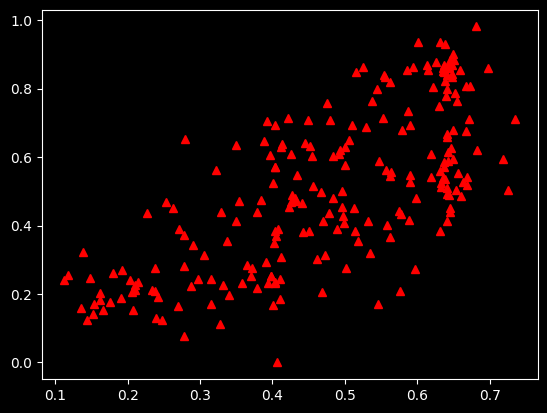

In [348]:
plt.plot(y_predict, y_test, "^", color='red')

In [349]:
y_predict_origin = scaler.inverse_transform(y_predict)

In [350]:
y_test_origin = scaler.inverse_transform(y_test)

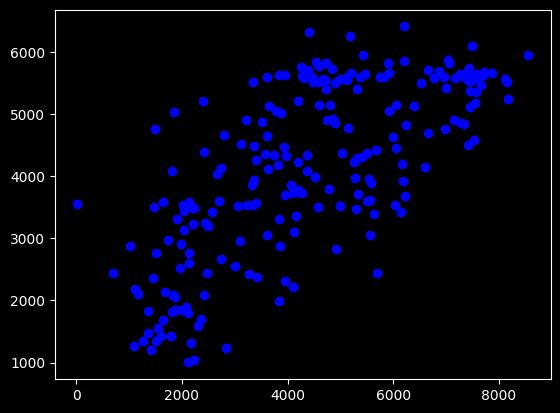

In [351]:
plt.plot(y_test_origin, y_predict_origin, "o", color='blue')

In [352]:
mae = mean_absolute_error(y_test_origin, y_predict_origin)
mse = mean_squared_error(y_test_origin, y_predict_origin)
rmse = sqrt(mse)
r2 = r2_score(y_test_origin, y_predict_origin)

In [353]:
print("MAE " ,mae, "\nMSE: ", mse, "\nRMSE ", rmse, "\nr2_score ", r2)

MAE  1184.3420249245385 
MSE:  2042786.662321302 
RMSE  1429.260879728156 
r2_score  0.48660364957581626
